# Caltech-256

Caltech-256 is a challenging set of 257 (including the last category of clutter) object categories containing a total of 30607 images. The original Caltech-101 [1] was collected by choosing a set of object categories, downloading examples from Google Images and then manually screening out all images that did not fit the category. Caltech-256 is collected in a similar manner with several improvements: a) the number of categories is more than doubled, b) the minimum number of images in any category is increased from 31 to 80, c) artifacts due to image rotation are avoided and d) a new and larger clutter category is introduced for testing background rejection. We suggest several testing paradigms to measure classification performance, then benchmark the dataset using two simple metrics as well as a state-of-the-art spatial pyramid matching [2] algorithm. Finally we use the clutter category to train an interest detector which rejects uninformative background regions. 



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import cv2
import pickle
%matplotlib inline

In [25]:
path = 'C:/csc522-project/dataset/unprocessed/'

In [16]:
os.chdir(path)

In [17]:
folders = os.listdir()

In [18]:
folder_paths = []
all_images = []
all_classes = []

In [22]:
img_size = 128

In [23]:
from PIL import Image

def make_square(image, min_size=img_size, fill_color=(0, 0, 0, 0)):
    size = (min_size, min_size)
    image.thumbnail(size, Image.Resampling.LANCZOS)
    background = Image.new('RGB', size, (255, 255, 255, 0))
    background.paste(
        image, (int((size[0] - image.size[0]) / 2), int((size[1] - image.size[1]) / 2))
    )

    new_img = np.array(background)
    new_img.flatten()
    return new_img

In [26]:
for folder in range(len(folders)):
    folder_paths = path+str(folders[folder])+str('/')
    
    os.chdir(folder_paths)
    image_in_folder = os.listdir()

    for image in range(len(image_in_folder)):
        img = Image.open(image_in_folder[image])
        img = make_square(img)
        
        all_images.append(img.flatten()/255)
        all_classes.append(folders[folder])


MemoryError: Unable to allocate 384. KiB for an array with shape (49152,) and data type float64

In [21]:
len(all_classes)

0

In [10]:
len(all_images)

30607

In [11]:
all_images[2].shape

(49152,)

In [12]:
len(all_images)

30607

In [13]:
all_images[0].shape

(49152,)

In [10]:
all_images_df = np.asarray(all_images)

In [13]:
all_images_df.shape

(0,)

# Pickle 

In [11]:
import sys
sys.getsizeof(all_images_df)

112

### Divide data such that it is less than 4GB

In [12]:
all_images_df1 = all_images_df[:10000,:]
all_images_df2 = all_images_df[10000:20000,:]
all_images_df3 = all_images_df[20000:,:]
print('all_images_df1:'+str(sys.getsizeof(all_images_df1)))
print('all_images_df2:'+str(sys.getsizeof(all_images_df2)))
print('all_images_df3:'+str(sys.getsizeof(all_images_df3)))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### Save 

In [19]:
picklepath = 'G:/Caltech256/'
os.chdir(picklepath)

In [20]:
import pickle

pickle_out = open("pickle_all_images_df1.pickle","wb")
pickle.dump(all_images_df1, pickle_out)
pickle_out.close()

pickle_out = open("pickle_all_images_df2.pickle","wb")
pickle.dump(all_images_df2, pickle_out)
pickle_out.close()

pickle_out = open("pickle_all_images_df3.pickle","wb")
pickle.dump(all_images_df3, pickle_out)
pickle_out.close()

pickle_out = open("pickle_all_classes.pickle","wb")
pickle.dump(all_classes, pickle_out)
pickle_out.close()

In [21]:
all_images_df1.shape

(10000, 49152)

In [22]:
all_images_df2.shape

(10000, 49152)

In [23]:
all_images_df3.shape

(10607, 49152)

### Restore 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import cv2
import pickle
%matplotlib inline

In [2]:
import os
picklepath = 'G:/Caltech256/'
os.chdir(picklepath)

In [3]:
import pickle
pickle_in = open("pickle_all_images_df1.pickle","rb")
all_images_df1 = pickle.load(pickle_in)

pickle_in = open("pickle_all_images_df2.pickle","rb")
all_images_df2 = pickle.load(pickle_in)

pickle_in = open("pickle_all_images_df3.pickle","rb")
all_images_df3 = pickle.load(pickle_in)

pickle_in = open("pickle_all_classes.pickle","rb")
all_classes = pickle.load(pickle_in)


In [4]:
img_size = 128

In [5]:
all_images = np.concatenate((all_images_df1, all_images_df2,all_images_df3), axis=0)

In [6]:
del all_images_df1
del all_images_df2
del all_images_df3

In [7]:
all_images.shape

(30607, 49152)

### Sample Images

We resize the images such that the whole image will fit into a square because our Neural Network can only process square images. A lot of the images are not squares and each one has an almost unique aspect ratio. We will not zoom in into the image but rather zoom out so that we will not be losing any parts of the object and furthermore, retain the aspect ratio. See the sample below.

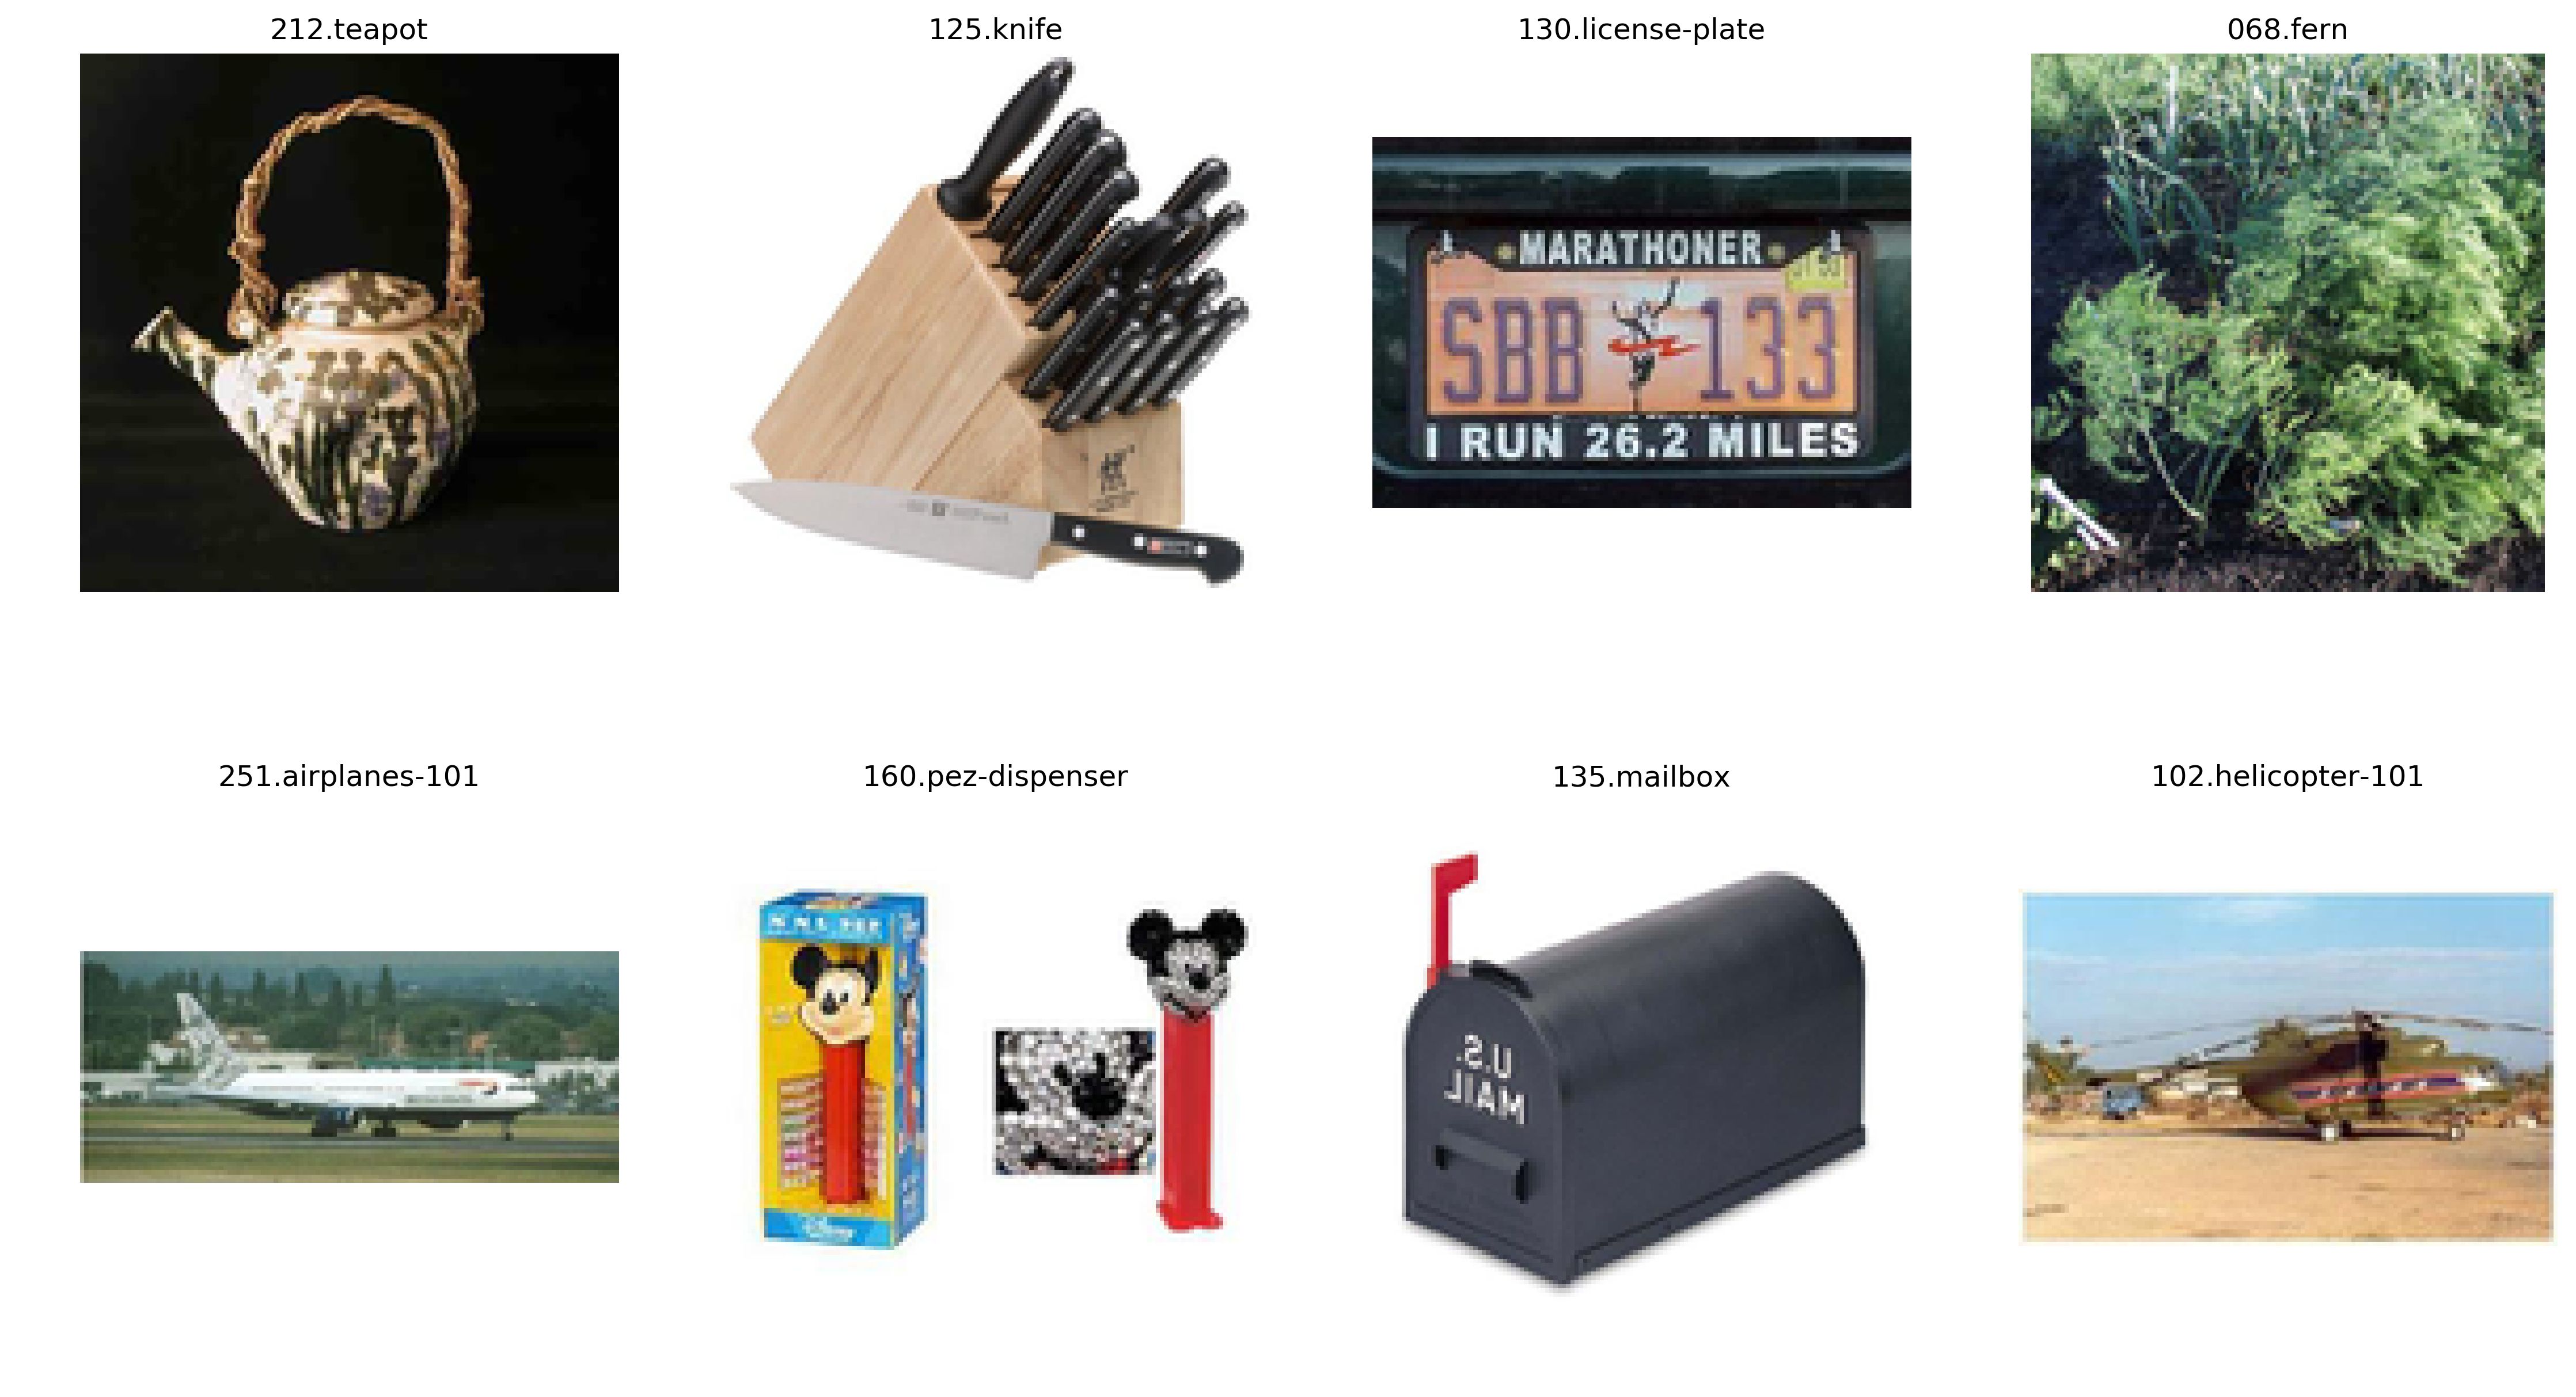

In [8]:
no_img = 8
images = np.random.choice(all_images.shape[0], no_img,replace=False)
f, axarr = plt.subplots(2,4)
f.set_size_inches(18.5, 10.5)
f.set_dpi(300)

for i in range(0,2):
    for j in range(0,4):
        image_index = images[(i*4)+(j+1)-1]
        axarr[i,j].imshow(all_images[image_index].reshape(img_size,img_size,3))
        axarr[i,j].set_title(all_classes[image_index])
        axarr[i,j].axis('off')
plt.savefig('Sample.png')

### List of Categories

In [9]:
set(all_classes)

{'001.ak47',
 '002.american-flag',
 '003.backpack',
 '004.baseball-bat',
 '005.baseball-glove',
 '006.basketball-hoop',
 '007.bat',
 '008.bathtub',
 '009.bear',
 '010.beer-mug',
 '011.billiards',
 '012.binoculars',
 '013.birdbath',
 '014.blimp',
 '015.bonsai-101',
 '016.boom-box',
 '017.bowling-ball',
 '018.bowling-pin',
 '019.boxing-glove',
 '020.brain-101',
 '021.breadmaker',
 '022.buddha-101',
 '023.bulldozer',
 '024.butterfly',
 '025.cactus',
 '026.cake',
 '027.calculator',
 '028.camel',
 '029.cannon',
 '030.canoe',
 '031.car-tire',
 '032.cartman',
 '033.cd',
 '034.centipede',
 '035.cereal-box',
 '036.chandelier-101',
 '037.chess-board',
 '038.chimp',
 '039.chopsticks',
 '040.cockroach',
 '041.coffee-mug',
 '042.coffin',
 '043.coin',
 '044.comet',
 '045.computer-keyboard',
 '046.computer-monitor',
 '047.computer-mouse',
 '048.conch',
 '049.cormorant',
 '050.covered-wagon',
 '051.cowboy-hat',
 '052.crab-101',
 '053.desk-globe',
 '054.diamond-ring',
 '055.dice',
 '056.dog',
 '057.dol

#### Imbalanced Plot

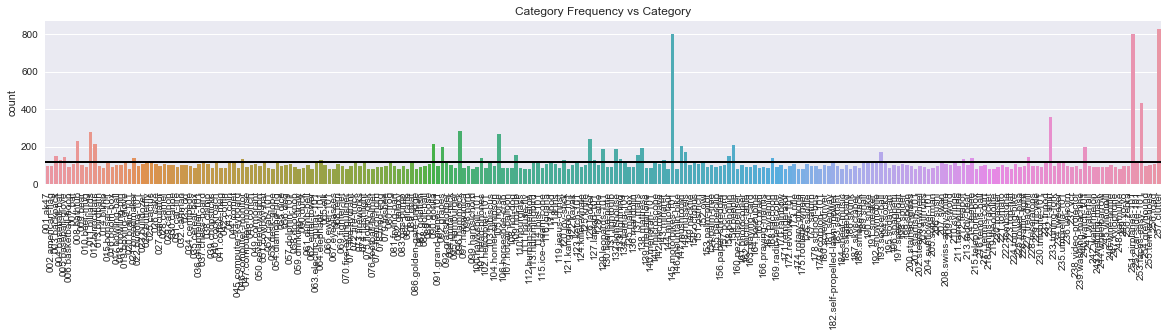

In [10]:
import seaborn as sns
plt.figure(figsize=(20,3))
ax = sns.countplot(all_classes)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_title("Category Frequency vs Category")
plt.axhline(pd.Series(all_classes).value_counts().mean(), color='k', linewidth=2,)
plt.show()

As we can see the distribution of the dataset is highly imbalanced that can throw off our model. The black line indicates the average for the dataset. There are categories that are almost 8 times more than the other categories.  

### Cross Validation 

In [11]:
all_classes = pd.get_dummies(all_classes) 
all_images = np.array(all_images)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_images, all_classes, test_size=0.1)

# Fully Connected Neural Networks

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras.backend as K
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [ ]:
learning_rate = 0.001
activation = 'tanh'
dropout = 0.75

model = Sequential()
model.add(Dense(2048, kernel_initializer='he_uniform', input_dim= img_size*img_size*3))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(dropout))

model.add(Dense(2048, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(dropout))

model.add(Dense(257, kernel_initializer='he_uniform', activation='softmax'))

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecutre.png', show_shapes=True, show_layer_names=True)

In [14]:
dflist = []
learning_rates = [0.1,0.01,0.001]
activations = ['relu','tanh','sigmoid']
dropouts = [.75,.5,.25]

for lr in learning_rates:
    for activation in activations:
        for dropout in dropouts:
            K.clear_session()
            print('learning rate: '+ str(lr))
            print('Activation: '+ str(activation))
            print('Dropout: '+ str(dropout))
            
            
            model = Sequential()
            model.add(Dense(2048, kernel_initializer='he_uniform', input_dim= img_size*img_size*3))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            model.add(Dropout(dropout))

            model.add(Dense(2048, kernel_initializer='he_uniform'))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            model.add(Dropout(dropout))

            model.add(Dense(257, kernel_initializer='he_uniform', activation='softmax'))
            model.compile(Adam(lr=lr),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            h = model.fit(X_train, y_train.values, batch_size=128, epochs=10, verbose=1,validation_split=0.1)
            dflist.append(pd.DataFrame(h.history, index=h.epoch))

learning rate: 0.1
Activation: relu
Dropout: 0.75
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 36s 1ms/step - loss: 15.6554 - acc: 0.0260 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 2/10
24791/24791 [==============================] - 31s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 3/10
24791/24791 [==============================] - 32s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 4/10
24791/24791 [==============================] - 32s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 5/10
24791/24791 [==============================] - 31s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 6/10
24791/24791 [==============================] - 31s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 7/10
24791/24791 [==============================] - 32s 1ms/s

24791/24791 [==============================] - 33s 1ms/step - loss: 15.6643 - acc: 0.0282 - val_loss: 15.6852 - val_acc: 0.0269
Epoch 6/10
24791/24791 [==============================] - 33s 1ms/step - loss: 15.6621 - acc: 0.0283 - val_loss: 15.7086 - val_acc: 0.0254
Epoch 7/10
24791/24791 [==============================] - 32s 1ms/step - loss: 15.6961 - acc: 0.0262 - val_loss: 15.7086 - val_acc: 0.0254
Epoch 8/10
24791/24791 [==============================] - 33s 1ms/step - loss: 15.6900 - acc: 0.0265 - val_loss: 15.7203 - val_acc: 0.0247
Epoch 9/10
24791/24791 [==============================] - 33s 1ms/step - loss: 15.6750 - acc: 0.0275 - val_loss: 15.6852 - val_acc: 0.0269
Epoch 10/10
24791/24791 [==============================] - 33s 1ms/step - loss: 15.6649 - acc: 0.0281 - val_loss: 15.6852 - val_acc: 0.0269
learning rate: 0.1
Activation: sigmoid
Dropout: 0.75
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 34s 1ms/step - l

24791/24791 [==============================] - 32s 1ms/step - loss: 4.0274 - acc: 0.1827 - val_loss: 4.8088 - val_acc: 0.1107
learning rate: 0.01
Activation: relu
Dropout: 0.25
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 34s 1ms/step - loss: 6.8785 - acc: 0.0805 - val_loss: 9.4380 - val_acc: 0.0243
Epoch 2/10
24791/24791 [==============================] - 33s 1ms/step - loss: 4.6404 - acc: 0.1228 - val_loss: 4.8284 - val_acc: 0.0849
Epoch 3/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.3715 - acc: 0.1479 - val_loss: 4.8144 - val_acc: 0.0868
Epoch 4/10
24791/24791 [==============================] - 33s 1ms/step - loss: 4.2066 - acc: 0.1664 - val_loss: 4.7283 - val_acc: 0.1082
Epoch 5/10
24791/24791 [==============================] - 33s 1ms/step - loss: 4.0514 - acc: 0.1806 - val_loss: 4.8251 - val_acc: 0.0966
Epoch 6/10
24791/24791 [==============================] - 33s 1ms/step - loss: 3.9227 - a

24791/24791 [==============================] - 33s 1ms/step - loss: 14.8189 - acc: 0.0393 - val_loss: 14.8806 - val_acc: 0.0334
Epoch 6/10
24791/24791 [==============================] - 33s 1ms/step - loss: 14.7994 - acc: 0.0389 - val_loss: 14.7679 - val_acc: 0.0319
Epoch 7/10
24791/24791 [==============================] - 33s 1ms/step - loss: 14.5312 - acc: 0.0404 - val_loss: 14.3690 - val_acc: 0.0439
Epoch 8/10
24791/24791 [==============================] - 33s 1ms/step - loss: 14.2904 - acc: 0.0435 - val_loss: 14.1122 - val_acc: 0.0421
Epoch 9/10
24791/24791 [==============================] - 32s 1ms/step - loss: 13.9874 - acc: 0.0465 - val_loss: 13.8506 - val_acc: 0.0454
Epoch 10/10
24791/24791 [==============================] - 33s 1ms/step - loss: 13.2000 - acc: 0.0472 - val_loss: 12.4586 - val_acc: 0.0472
learning rate: 0.01
Activation: sigmoid
Dropout: 0.25
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 35s 1ms/step - 

learning rate: 0.001
Activation: tanh
Dropout: 0.5
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 33s 1ms/step - loss: 5.5872 - acc: 0.0731 - val_loss: 5.0521 - val_acc: 0.0897
Epoch 2/10
24791/24791 [==============================] - 32s 1ms/step - loss: 5.1989 - acc: 0.1017 - val_loss: 4.9582 - val_acc: 0.1216
Epoch 3/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.9606 - acc: 0.1201 - val_loss: 4.9982 - val_acc: 0.0947
Epoch 4/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.7912 - acc: 0.1372 - val_loss: 4.8225 - val_acc: 0.1172
Epoch 5/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.6195 - acc: 0.1501 - val_loss: 4.7556 - val_acc: 0.1191
Epoch 6/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.5025 - acc: 0.1612 - val_loss: 4.8190 - val_acc: 0.1122
Epoch 7/10
24791/24791 [==============================] - 32s 1ms/step - loss:

## Results 

In [15]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates,activations,dropouts, metrics_reported],
                                 names=['learning_rate', 'activations','dropouts','metric'])
historydf.columns = idx
historydf = historydf.T

In [46]:
historydf.to_csv('historydf.csv')

In [26]:
historydf

0          1          2  \
learning_rate activations dropouts metric                                      
0.100         relu        0.75     acc        0.025977   0.026260   0.026260   
                                   loss      15.655389  15.694841  15.694841   
                                   val_acc    0.027586   0.027586   0.027586   
                                   val_loss  15.673458  15.673458  15.673458   
                          0.50     acc        0.044613   0.046549   0.047074   
                                   loss      15.343083  15.367169  15.358870   
                                   val_acc    0.033394   0.044283   0.042105   
                                   val_loss  15.579850  15.399481  15.436330   
                          0.25     acc        0.032552   0.032229   0.031786   
                                   loss      15.541169  15.598169  15.605770   
                                   val_acc    0.033757   0.031216   0.032305   
                                   val_loss  15.574000  15.614953  15.597402   
              tanh        0.75     acc        0.042636   0.046549   0.031181   
                                   loss      15.343776  15.367254  15.614730   
                                   val_acc    0.041742   0.045009   0.027949   
                                   val_loss  15.438877  15.389261  15.667607   
                          0.50     acc        0.040095   0.042435   0.043605   
                                   loss      15.383883  15.432780  15.414009   
                                   val_acc    0.040653   0.041016   0.042105   
                                   val_loss  15.459783  15.456990  15.439439   
                          0.25     acc        0.025170   0.027550   0.027954   
                                   loss      15.630373  15.672961  15.666963   
                                   val_acc    0.026134   0.027223   0.026860   
                                   val_loss  15.696860  15.679309  15.685159   
              sigmoid     0.75     acc        0.026179   0.027954   0.014360   
                                   loss      15.642423  15.667019  15.885009   
                                   val_acc    0.025408   0.027586   0.005808   
                                   val_loss  15.708561  15.673458  16.024487   
                          0.50     acc        0.026824   0.027107   0.027107   
                                   loss      15.631378  15.681188  15.681188   
...                                                ...        ...        ...   
0.001         relu        0.50     val_acc    0.091833   0.108530   0.113249   
                                   val_loss   5.223526   4.768183   4.771180   
                          0.25     acc        0.096124   0.136864   0.171151   
                                   loss       5.215133   4.627026   4.276141   
                                   val_acc    0.085662   0.097641   0.070417   
                                   val_loss   5.281691   4.913810   5.191776   
              tanh        0.75     acc        0.048364   0.071478   0.084103   
                                   loss       6.269705   5.837033   5.596762   
                                   val_acc    0.072958   0.092196   0.111434   
                                   val_loss   5.148072   5.043399   4.833334   
                          0.50     acc        0.073091   0.101730   0.120124   
                                   loss       5.587193   5.198858   4.960587   
                                   val_acc    0.089655   0.121597   0.094737   
                                   val_loss   5.052087   4.958202   4.998243   
                          0.25     acc        0.083014   0.121697   0.149006   
                                   loss       5.378775   4.902071   4.652533   
                                   val_acc    0.075136   0.096915   0.105989   
                                   val_loss   5.21206

As we can see this method is not effective. The best the model did is an accuracy of 14% in the test set using 0.001 learning rate, tanh activation and .75 dropout. The model is not learning enough, we can do much better with the use of Convolutional Neural Networks.